In [1]:
from utils import simulate_clsna, visualize, visualize_membership, preprocess, ClsnaModel
import numpy as np
import torch
import math
import matplotlib.pyplot as plt
from scipy.linalg import orthogonal_procrustes

In [2]:
# from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter(log_dir='../runs/jweqiag', comment = "")

In [3]:
import time

In [4]:
N = 100
DIM = 2
T = 10
SIGMA = 1
TAU = 1
ALPHA = 1
DELTA = 2
GAMMAW = 0.25
GAMMAB = 0.5

In [5]:
start = time.time()
z,y,Aw,Ab=simulate_clsna(N=N,d=DIM,T=T,alpha=ALPHA,delta=DELTA,sigma=SIGMA, tau=TAU, gammaw=GAMMAW, gammab=GAMMAB)
end = time.time()
print(end - start)

0.12015318870544434


In [6]:
z = np.concatenate(z)

In [7]:
for i in range(T-1):
    corr = z[N*i:N*(i+1)].transpose()@z[N*(i+1):N*(i+2)]
#     print(np.diag(corr.round(1)))
    print(corr.round(1))

[[78.2 22.5]
 [-1.4 46.8]]
[[100.   -4.2]
 [ 23.6  65.3]]
[[83.6  9.5]
 [11.9 67.1]]
[[62.  18. ]
 [ 2.4 66.3]]
[[52.7 -1.4]
 [-6.3 81.9]]
[[37.3 10.4]
 [ 4.2 72.3]]
[[ 48.3 -10.8]
 [ 20.4  62.7]]
[[56.7 14.3]
 [14.1 56.4]]
[[36.8  6.4]
 [11.9 65.6]]


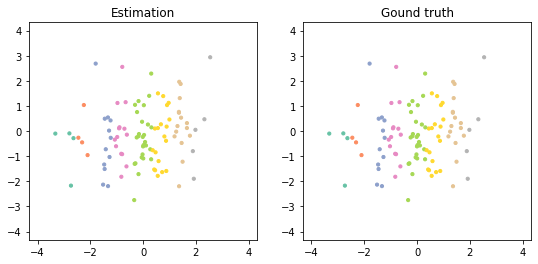

array([[ 4.44089210e-16, -9.71445147e-17],
       [-2.22044605e-16, -2.22044605e-16],
       [ 1.04083409e-17, -1.11022302e-16],
       [ 4.44089210e-16, -1.38777878e-16],
       [ 5.55111512e-17, -2.22044605e-16],
       [ 1.11022302e-16,  0.00000000e+00],
       [-2.22044605e-16,  1.11022302e-16],
       [-5.55111512e-17, -2.22044605e-16],
       [ 2.22044605e-16, -2.77555756e-17],
       [ 1.11022302e-16, -4.44089210e-16],
       [ 1.11022302e-16, -1.38777878e-17],
       [ 2.22044605e-16, -1.11022302e-16],
       [ 1.11022302e-16, -2.22044605e-16],
       [-1.38777878e-17,  1.11022302e-16],
       [-4.44089210e-16,  4.44089210e-16],
       [ 2.22044605e-16, -4.44089210e-16],
       [ 4.44089210e-16, -3.33066907e-16],
       [ 2.77555756e-17, -1.11022302e-16],
       [ 2.22044605e-16, -1.66533454e-16],
       [-2.22044605e-16, -2.22044605e-16],
       [ 2.22044605e-16,  2.22044605e-16],
       [ 5.55111512e-17,  4.44089210e-16],
       [ 2.22044605e-16, -2.22044605e-16],
       [ 2.

In [9]:
visualize(z_hat=z,z_true=z,start=N*3,end=N*4)

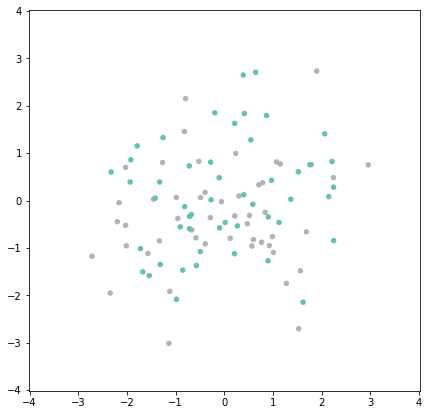

In [10]:
membership = np.concatenate((np.ones(N//2),np.zeros(N//2)))
visualize_membership(z=z,membership=np.tile(membership,T),start=N,end=2*N)

In [11]:
label, persist, Aw, Ab, combination_N=preprocess(y, Aw, Ab, N, T)

In [12]:
label.sum()/label.size(0)

tensor(0.4682)

In [13]:
_s = torch.arange(0,N*(T-1), requires_grad = False)
ar_pair = torch.stack((_s,_s+N), dim = 1)

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = "cpu"

In [15]:
combination_N = combination_N.to(device)
label = label.to(device)
persist = persist.to(device)

In [16]:
LR = 2e-3
MOM = 0.99
LR_P = 1e-2

# step 0

In [17]:
# model = ClsnaModel(device,N,T,ar_pair,Aw,Ab,D=2).to(device)

In [18]:
# with torch.no_grad():       
#     model.z[:,:] = torch.from_numpy(z).to(device)
#     #logsigma2
#     model.para[0,0] = model.para[0,0].clip(min=2*math.log(SIGMA), max=2*math.log(SIGMA))
#     #logtau2
#     model.para[1,0] = model.para[1,0].clip(min=2*math.log(TAU), max=2*math.log(TAU))
#     #gamma
#     model.para[1,1] = model.para[1,1].clip(min=GAMMAW, max=GAMMAW)+0.1
#     model.para[2,0] = model.para[2,0].clip(min=GAMMAB, max=GAMMAB)-0.1
#     #alpha
#     model.para[0,1] = model.para[0,1].clip(min=ALPHA, max=ALPHA)
#     #delta
#     model.para[2,1] = model.para[0,1].clip(min=DELTA, max=DELTA)

In [19]:
# t_index=torch.arange(start=0,end=N*T,device=device,requires_grad=False)
# loss = model.loss(device=device,label=label,persist=persist,sample_edge=combination_N,T_index=t_index,ss=SIGMA,tt=TAU)
# print(loss)

In [20]:
# t_index=torch.arange(start=0,end=N*T,device=device,requires_grad=False)
# loss = model.loss(device=device,label=label,persist=persist,sample_edge=combination_N,T_index=t_index,ss=SIGMA,tt=TAU)
# print(loss)

In [21]:
step0z = torch.from_numpy(z).float()
step0x1 = Aw@step0z[:(T-1)*N]
step0x2 = Ab@step0z[:(T-1)*N]
step0X = torch.stack((step0x1.flatten(), step0x2.flatten()))
torch.inverse(step0X@step0X.t())*10000

tensor([[ 64.9484, -61.6743],
        [-61.6743,  65.7101]])

In [22]:
assert 2==1

AssertionError: 

# Step 1

In [23]:
def train(optimizer,update=False, index=None, fixed=None):
    t_index=torch.arange(start=0,end=N*T,device=device,requires_grad=False)
    optimizer.zero_grad()
    loss = model.loss(device=device,label=label,persist=persist,sample_edge=combination_N,T_index=t_index,ss=SIGMA,tt=TAU)
    loss.backward()
    model.para.grad = 0.1*((model.para.grad>0).bool().float()-0.5)
    if update:
        plt.hist(torch.log10((model.z.grad).pow(2)+1e-20).cpu().detach().numpy().flatten(), bins=100)
        plt.show()
        z_hat1, p_hat1 = model()
        z_hat1 = z_hat1.detach().clone()
        p_hat1 = p_hat1.detach().clone()
        optimizer.step()
        z_hat2, p_hat2 = model()
        plt.hist(torch.log10((z_hat1-z_hat2).pow(2)+1e-20).cpu().detach().numpy().flatten(), bins=100)
        plt.show()
    else:
        optimizer.step()
    if index is not None:
        with torch.no_grad():
            model.para[index[0],index[1]] = fixed
    return loss.item()

In [24]:
def run(optimizer):
    stop = 0
    last_loss = 0
    for epoch in range(1,200000000):
        if stop>15:
            break
        loss = train(optimizer)
        if optimizer.param_groups[0]['lr']<1e-15:
            break
        if epoch%111==0:
            print(model.z.max())
            print(model.para)
            print(stop)
            print(loss)
            PCA_p = torch.pca_lowrank(model.z.cpu())[2][:,[0,1]]
            zz=(model.z.cpu().detach()@PCA_p).detach().numpy()
            align = 1
            for i in range(T-1):
                d1=zz[N*i:N*(i+1)]
                d2=zz[N*(i+1):N*(i+2)]
                c1=d1-(d1.mean(axis=0))[np.newaxis,:]
                c2=d2-(d2.mean(axis=0))[np.newaxis,:]
                R,_ = orthogonal_procrustes(c1,c2)
                if not np.all(np.diag(R.round(1)) == 1):
                    align = 0
                    break
            if align==1:
                stop = stop+1
            else:
                stop = 0
            
        if epoch%111==0 and epoch>111111:
            tt = epoch%T
            print(torch.pca_lowrank(model.z.cpu()))
            z_hat, p_hat = model()
            z_hat = z_hat.detach().cpu().numpy()
            p_hat = p_hat.detach().cpu().numpy().round(2)
            caption_dict = {'E':epoch,
                            'T':tt,
                            'a':p_hat[0,1],
                            'd':p_hat[2,1],
                            'gw':p_hat[1,1],
                            'gb':p_hat[2,0],
#                             's':round(math.exp(p_hat[0,0])**0.5,1),
#                             't':round(math.exp(p_hat[1,0])**0.5,1),
                           'lr':round(optimizer.param_groups[0]['lr'],2),
                           'loss':round(loss,1)}
            start = tt*N
            end = (tt+1)*N
            visualize(z_hat=z_hat[:,:2],z_true=z[:,[1,0]],start=start,end=end,caption=str(caption_dict))            
            

In [25]:
model = ClsnaModel(device,N,T,ar_pair,Aw,Ab,D=3).to(device)

In [26]:
optimizer = torch.optim.SGD([
    {'params': model.z, "momentum": 0.99, "lr": 0.002},
    {'params': model.para, "momentum": 0, "lr":1e-1}
    ])

In [27]:
run(optimizer)

tensor(2.3545, grad_fn=<MaxBackward1>)
Parameter containing:
tensor([[0.5550, 0.5550],
        [0.5550, 0.4750],
        [0.4950, 0.5550]], requires_grad=True)
0
31950.489158683573
tensor(2.9436, grad_fn=<MaxBackward1>)
Parameter containing:
tensor([[1.1100, 1.1100],
        [1.1100, 0.4100],
        [0.4900, 1.1100]], requires_grad=True)
0
27258.432346731468
tensor(3.4685, grad_fn=<MaxBackward1>)
Parameter containing:
tensor([[1.6650, 1.2550],
        [1.6650, 0.4250],
        [0.3650, 1.6650]], requires_grad=True)
0
25928.453315881143
tensor(3.3229, grad_fn=<MaxBackward1>)
Parameter containing:
tensor([[2.2200, 1.1400],
        [2.2200, 0.4200],
        [0.3300, 1.9300]], requires_grad=True)
0
25631.73239487176
tensor(3.4037, grad_fn=<MaxBackward1>)
Parameter containing:
tensor([[2.7750, 1.1350],
        [2.7750, 0.3750],
        [0.3250, 1.9350]], requires_grad=True)
0
25539.512596281354
tensor(3.3984, grad_fn=<MaxBackward1>)
Parameter containing:
tensor([[3.3300, 1.1400],
        [

In [28]:
model.para

Parameter containing:
tensor([[11.1002,  1.1400],
        [11.1002,  0.3700],
        [ 0.2700,  1.9300]], requires_grad=True)

tensor([34.1957, 29.9744, 24.4474], grad_fn=<LinalgSvdBackward0>)
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
------------
[0.99 0.99]
[1. 1.]
[0.98 0.98]
[0.98 0.98]
[1. 1.]
[0.88 0.88]
[0.96 0.96]
[ 1. -1.]
0
tensor([10.0122,  9.6030,  6.4931], grad_fn=<LinalgSvdBackward0>)


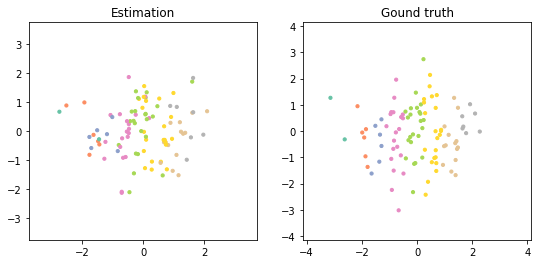

1
tensor([12.5142,  9.9786,  6.7690], grad_fn=<LinalgSvdBackward0>)


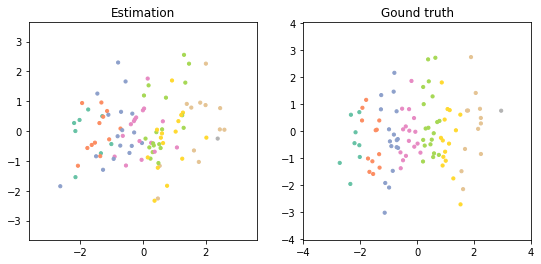

2
tensor([11.5392, 10.3575,  6.4198], grad_fn=<LinalgSvdBackward0>)


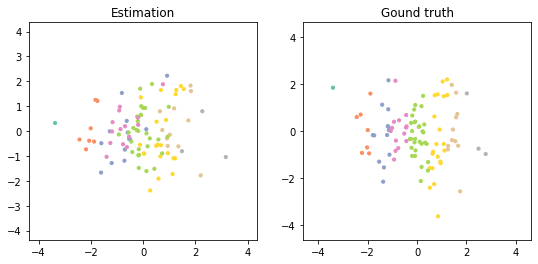

3
tensor([12.0173, 10.0669,  6.3506], grad_fn=<LinalgSvdBackward0>)


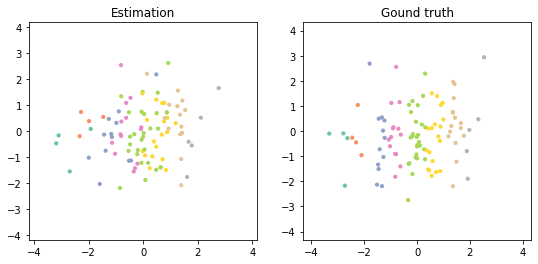

4
tensor([11.6369, 10.0580,  7.0257], grad_fn=<LinalgSvdBackward0>)


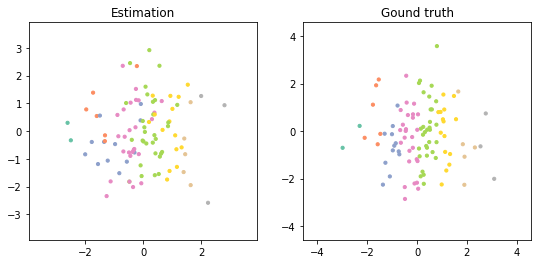

5
tensor([11.1931,  9.5538,  6.9061], grad_fn=<LinalgSvdBackward0>)


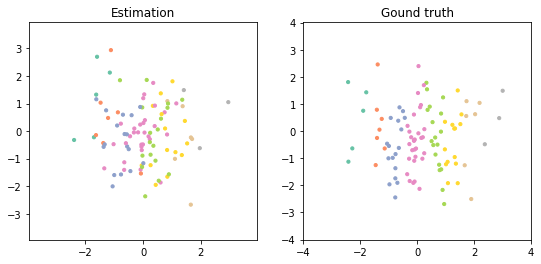

6
tensor([10.9528,  8.5768,  6.8684], grad_fn=<LinalgSvdBackward0>)


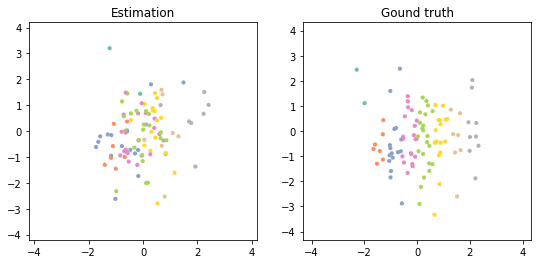

7
tensor([11.4752,  9.2077,  6.8464], grad_fn=<LinalgSvdBackward0>)


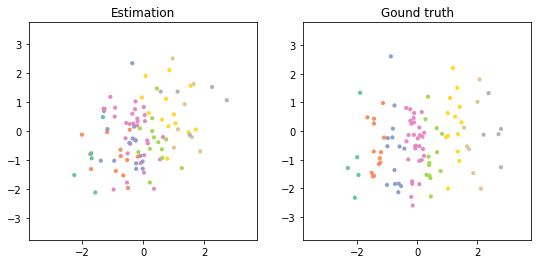

8
tensor([9.8879, 9.5264, 7.1491], grad_fn=<LinalgSvdBackward0>)


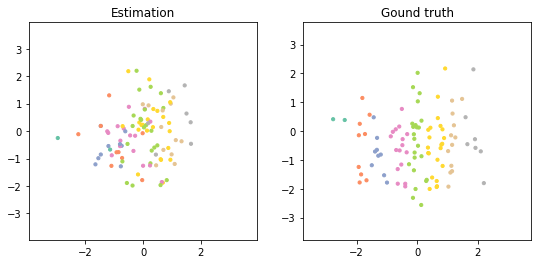

9
tensor([10.9094, 10.0230,  6.7184], grad_fn=<LinalgSvdBackward0>)


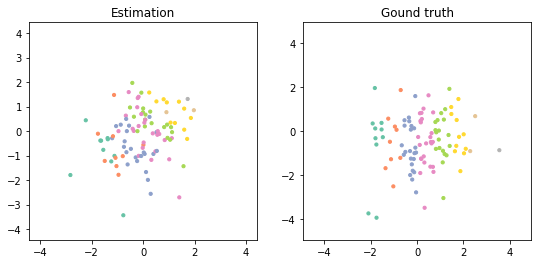

In [29]:
print(torch.pca_lowrank(model.z.cpu())[1])
PCA_p = torch.pca_lowrank(model.z.cpu())[2][:,[0,1]]
zz=(model.z.cpu().detach()@PCA_p).detach().numpy()
for i in range(T-1):
    R,_=orthogonal_procrustes(zz[N*i:N*(i+1)],zz[N*(i+1):N*(i+2)])
    print(np.diag(R.round(2)))
print('------------')
for i in range(T-2):
    R,_=orthogonal_procrustes(zz[N*i:N*(i+1)],zz[N*(i+2):N*(i+3)])
    print(np.diag(R.round(2)))
for i in range(T):
    B=torch.pca_lowrank(model.z.cpu()[i*N:(i+1)*N])[1]
    print(i)
    print(B)
    visualize(z_hat=zz,z_true=z[:,[0,1]],start=N*i,end=N*(i+1))
init_z = zz
init_para = model.para.detach().cpu().numpy()

In [30]:
for i in range(T-1):
    R,_=orthogonal_procrustes(z[N*i:N*(i+1)],z[N*(i+1):N*(i+2)])
    print(np.diag(R.round(2)))
print('------------')
TT = 9
for i in range(T-TT):
    R,_=orthogonal_procrustes(z[N*i:N*(i+1)],z[N*(i+TT):N*(i+TT+1)])
    print(np.diag(R.round(2)))

[0.98 0.98]
[0.99 0.99]
[1. 1.]
[0.99 0.99]
[1. 1.]
[1. 1.]
[0.96 0.96]
[1. 1.]
[1. 1.]
------------
[-0.97  0.97]


# Step 2

In [31]:
model = ClsnaModel(device,N,T,ar_pair,Aw,Ab,D=2).to(device)
with torch.no_grad():       
    model.z[:,:] = torch.from_numpy(init_z).to(device)
    model.para[:,:] = torch.from_numpy(init_para).to(device)
optimizer = torch.optim.SGD([
    {'params': model.z, "momentum": MOM, "lr": LR},
    {'params': model.para, "momentum": 0.0, "lr":LR_P}
    ])

In [32]:
def run(optimizer):
    for epoch in range(1,2000):
        optimizer.param_groups[0]['lr'] = 0.0005

        if optimizer.param_groups[0]['lr']<0.00001:
            break
        loss = train(optimizer)
        if epoch%111==0:
            print(loss)
            print(model.para)
#         if epoch%1111==0 and epoch>111111:
#             tt = epoch%T
#             print(torch.pca_lowrank(model.z.cpu()))
#             z_hat, p_hat = model()
#             z_hat = z_hat.detach().cpu().numpy()
#             p_hat = p_hat.detach().cpu().numpy().round(2)
#             caption_dict = {'E':epoch,
#                             'T':tt,
#                             'a':p_hat[0,1],
#                             'd':p_hat[2,1],
#                             'gw':p_hat[1,1],
#                             'gb':p_hat[2,0],
# #                             's':round(math.exp(p_hat[0,0])**0.5,1),
# #                             't':round(math.exp(p_hat[1,0])**0.5,1),
#                            'lr':round(optimizer.param_groups[0]['lr'],3),
#                            'loss':round(loss,1)}
#             start = tt*N
#             end = (tt+1)*N
#             visualize(z_hat=z_hat[:,:2],z_true=z[:,[1,0]],start=start,end=end,caption=str(caption_dict))
            
#             writer.add_scalar("Plot/logL", loss, epoch)
#             writer.add_scalar("Plot/alpha", p_hat[0,1], epoch)
#             writer.add_scalar("Plot/gw", p_hat[1,1], epoch)
#             writer.add_scalar("Plot/gb", p_hat[2,0], epoch)
#             writer.add_scalar("Plot/delta", p_hat[2,1], epoch)
#             writer.add_scalar("Plot/lr", optimizer.param_groups[0]['lr'], epoch)
            
            

In [33]:
run(optimizer)

26026.24638451537
Parameter containing:
tensor([[11.1557,  1.1285],
        [11.1557,  0.3525],
        [ 0.2765,  1.9285]], requires_grad=True)
25908.509062372505
Parameter containing:
tensor([[11.2111,  1.0730],
        [11.2111,  0.3120],
        [ 0.3080,  1.8990]], requires_grad=True)
25852.23310736879
Parameter containing:
tensor([[11.2666,  1.0175],
        [11.2666,  0.2975],
        [ 0.3285,  1.8755]], requires_grad=True)
25824.409929582216
Parameter containing:
tensor([[11.3221,  0.9620],
        [11.3221,  0.3090],
        [ 0.3240,  1.8920]], requires_grad=True)
25807.602743824333
Parameter containing:
tensor([[11.3776,  0.9065],
        [11.3776,  0.3095],
        [ 0.3255,  1.9065]], requires_grad=True)
25798.02739960517
Parameter containing:
tensor([[11.4330,  0.8510],
        [11.4330,  0.3120],
        [ 0.3300,  1.9210]], requires_grad=True)
25794.17202201059
Parameter containing:
tensor([[11.4885,  0.7955],
        [11.4885,  0.3135],
        [ 0.3325,  1.9345]], re

In [34]:
LR

0.002

In [35]:
zz = model.z.cpu().detach().numpy()

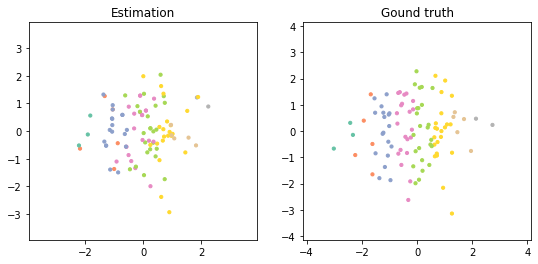

[-0.01629722 -0.17017563]
[ 0.03194983 -0.05481722]


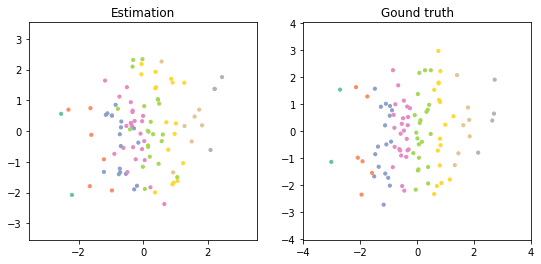

[-0.08133378 -0.29878469]
[-0.01881862  0.07780349]


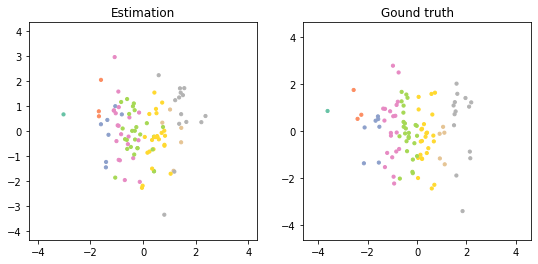

[ 0.00126795 -0.14292759]
[-0.05359068 -0.1469022 ]


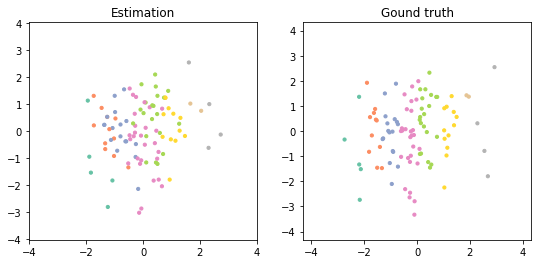

[ 0.20204648 -0.09731172]
[-0.29489346 -0.24497269]


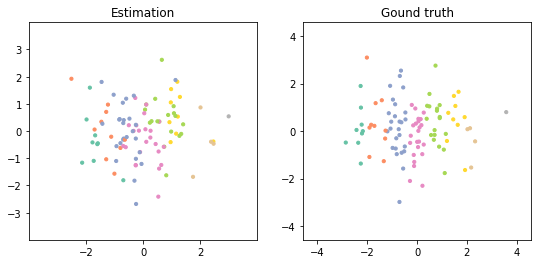

[ 0.16213836 -0.05545018]
[ 0.09872474 -0.29285676]


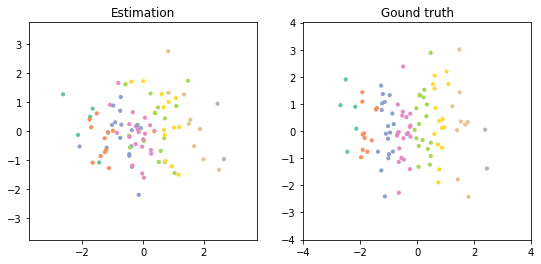

[ 0.19282192 -0.36254882]
[ 0.10669229 -0.16755914]


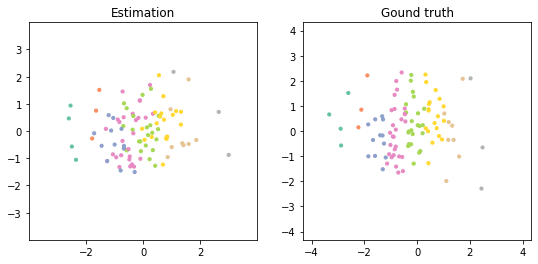

[ 0.16134452 -0.24531508]
[ 0.18005806 -0.36570474]


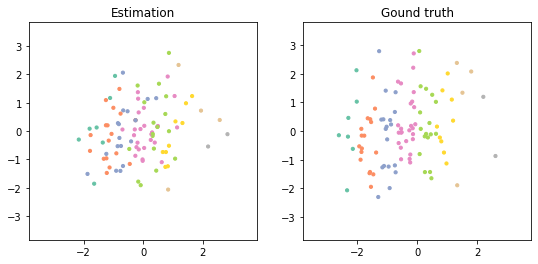

[-0.04943871 -0.55235821]
[ 0.2221523  -0.34913852]


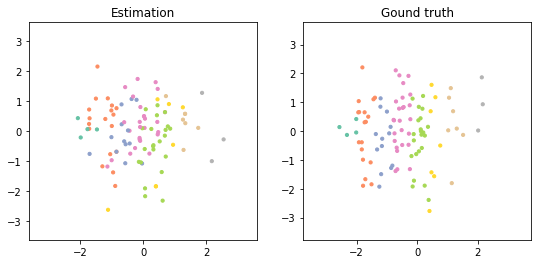

[-0.04201889 -0.59613709]
[ 0.03022598 -0.35111922]


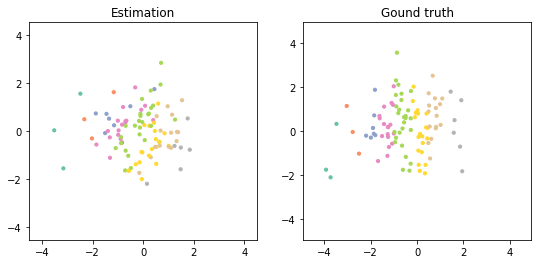

[ 0.31913732 -0.44915508]
[ 0.17862135 -0.51010416]


In [36]:
for i in range(T):
    visualize(z_hat=zz,z_true=z[:,[1,0]],start=N*i,end=N*(i+1))
    print(z[N*i:N*i+N//2].mean(axis=0))
    print(z[N*i+N//2:N*i+N].mean(axis=0))


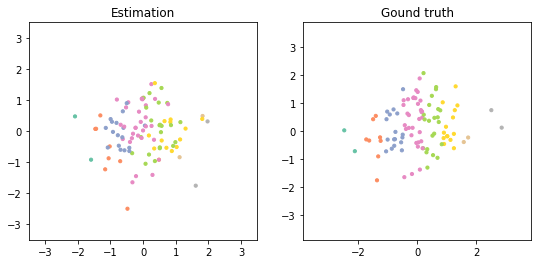

[0.08254645 0.23067013]
[-0.00445107  0.12460656]


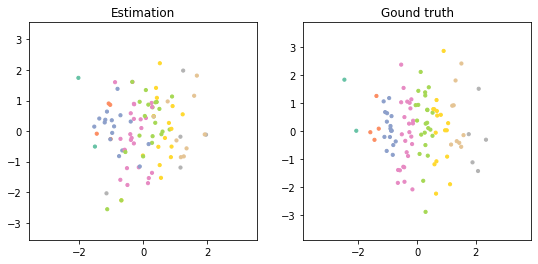

[-0.03786862  0.02665839]
[0.17235625 0.17065274]


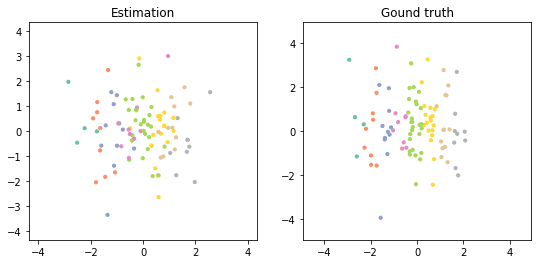

[-0.3754404   0.34271388]
[0.15614718 0.19772575]


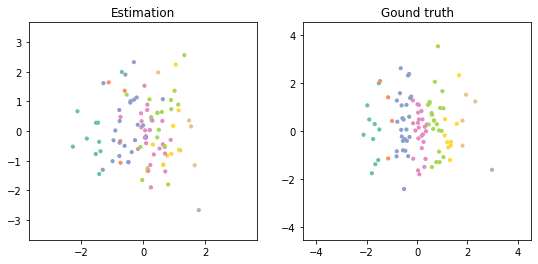

[-0.21436347  0.28917337]
[0.34398523 0.08969823]


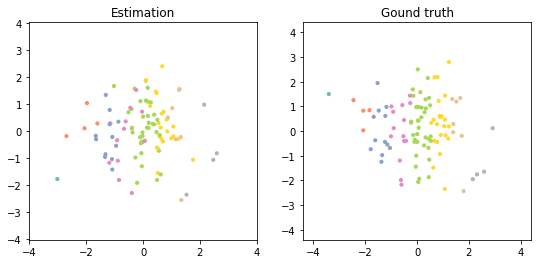

[0.01288279 0.34548094]
[ 0.168547   -0.07000561]


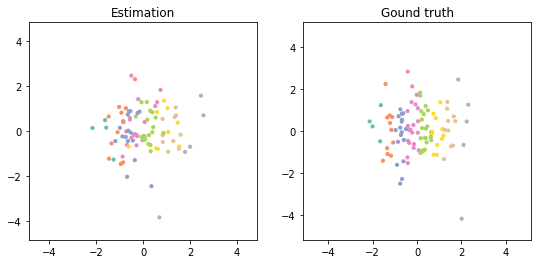

[ 0.13813868 -0.03727794]
[-0.05671353  0.14397355]


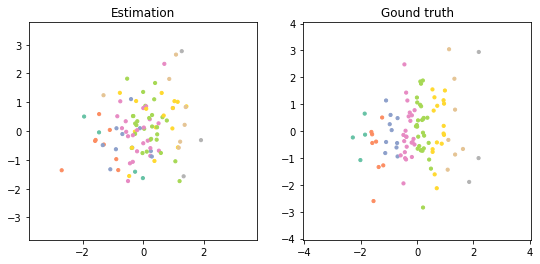

[-0.15508088 -0.0274387 ]
[ 0.07109224 -0.01374554]


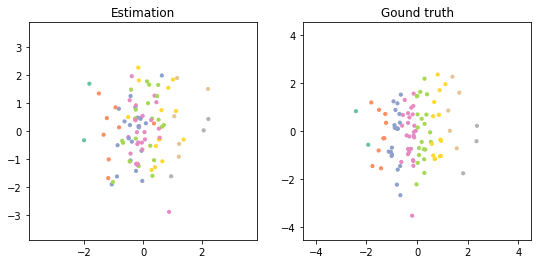

[-0.28135506  0.02137098]
[ 0.04474422 -0.1722047 ]


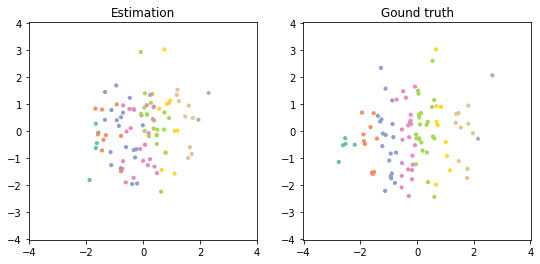

[-0.19537907 -0.20515633]
[-0.24019958 -0.17702087]


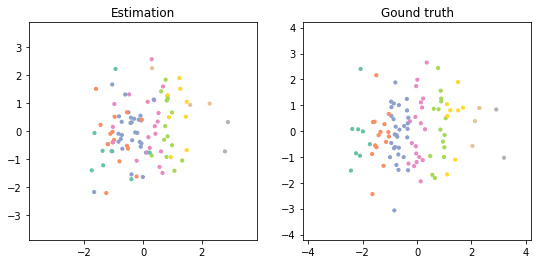

[-0.16022709 -0.00486659]
[-0.27112083 -0.00124827]


In [71]:
for i in range(T):
    visualize(z_hat=zz,z_true=z[:,[0,1]],start=N*i,end=N*(i+1))
    print(z[N*i:N*i+N//2].mean(axis=0))
    print(z[N*i+N//2:N*i+N].mean(axis=0))


In [37]:
for i in range(T-1):
#     corr = zz[N*i:N*(i+1)].transpose()@zz[N*(i+1):N*(i+2)]
#     print(corr.round(1))
    d1=zz[N*i:N*(i+1)]
    d2=zz[N*(i+1):N*(i+2)]
    c1=d1-(d1.mean(axis=0))[np.newaxis,:]
    c2=d2-(d2.mean(axis=0))[np.newaxis,:]
    R,_ = orthogonal_procrustes(c1,c2)
    print(np.diag(R).round(2))
print('-------------------------')
for i in range(T-2):
#     corr = zz[N*i:N*(i+1)].transpose()@zz[N*(i+1):N*(i+2)]
#     print(corr.round(1))
    d1=zz[N*i:N*(i+1)]
    d2=zz[N*(i+2):N*(i+3)]
    c1=d1-(d1.mean(axis=0))[np.newaxis,:]
    c2=d2-(d2.mean(axis=0))[np.newaxis,:]
    R,_ = orthogonal_procrustes(c1,c2)
    print(np.diag(R).round(2))

[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]
-------------------------
[1. 1.]
[0.99 0.99]
[0.97 0.97]
[0.97 0.97]
[1. 1.]
[0.88 0.88]
[0.99 0.99]
[ 0.99 -0.99]


In [38]:
model.para

Parameter containing:
tensor([[12.0992,  0.7845],
        [12.0992,  0.3155],
        [ 0.3315,  1.9365]], requires_grad=True)

In [39]:
# for i in range(T-1):
#     corr = zz[N*i:N*(i+1)].transpose()@zz[N*(i+1):N*(i+2)]
#     print(corr.round(1))
# #     R,_ = orthogonal_procrustes(zz[N*i:N*(i+1)],zz[N*(i+1):N*(i+2)])
# #     print(np.diag(R))

In [40]:
init_z = zz
init_para = model.para.detach().cpu().numpy()

In [41]:
init_para

array([[12.099157  ,  0.7844992 ],
       [12.099157  ,  0.31550053],
       [ 0.33149913,  1.9364979 ]], dtype=float32)

# Step 3

In [42]:
def run(optimizer,index,fixed):
    for epoch in range(1,1000):
        loss = train(optimizer=optimizer,index=index,fixed=fixed)
        if optimizer.param_groups[0]['lr']<0.0001:
            break
        if epoch%1111==0 and epoch>111111:
            tt = epoch%T
            z_hat, p_hat = model()
            z_hat = z_hat.detach().cpu().numpy()
            p_hat = p_hat.detach().cpu().numpy().round(2)
            caption_dict = {'E':epoch,
                            'T':tt,
                            'a':p_hat[0,1],
                            'd':p_hat[2,1],
                            'gw':p_hat[1,1],
                            'gb':p_hat[2,0],
#                             's':round(math.exp(p_hat[0,0])**0.5,1),
#                             't':round(math.exp(p_hat[1,0])**0.5,1),
                           'lr':round(optimizer.param_groups[0]['lr'],2),
                           'loss':round(loss,1)}
            start = tt*N
            end = (tt+1)*N
#             visualize(z_hat=z_hat[:,:2],z_true=z[:,[1,0]],start=start,end=end,caption=str(caption_dict))
    return loss

In [43]:
model = ClsnaModel(device,N,T,ar_pair,Aw,Ab,D=2).to(device)
with torch.no_grad():       
    model.z[:,:] = torch.from_numpy(init_z).to(device)
    model.para[:,:] = torch.from_numpy(init_para).to(device)
optimizer = torch.optim.SGD([
    {'params': model.z, "momentum": MOM, "lr": LR},
    {'params': model.para, "momentum": 0.0, "lr":LR_P}
    ])    
logL = train(optimizer)

In [44]:
delta_var = 0.1

In [45]:
parad = {'alpha':(0,1),'delta':(2,1),'gw':(1,1),'gb':(2,0)}
var_list = []
for key, value in parad.items():
    model = ClsnaModel(device,N,T,ar_pair,Aw,Ab,D=2).to(device)
    with torch.no_grad():       
        model.z[:,:] = torch.from_numpy(init_z).to(device)
        model.para[:,:] = torch.from_numpy(init_para).to(device)
    optimizer = torch.optim.SGD([
    {'params': model.z, "momentum": MOM, "lr": LR},
    {'params': model.para, "momentum": 0.0, "lr":LR_P}
    ])
    newlogL=run(optimizer,value,init_para[value[0],value[1]]+delta_var)
    print("--------------------------------")
    print(key,delta_var/(newlogL-logL)**0.5/2**0.5)
    var_hat = delta_var/(newlogL-logL)**0.5/2**0.5
    var_list.append(round(var_hat,4))

--------------------------------
alpha 0.02482838720172107
--------------------------------
delta 0.024296188059950753
--------------------------------
gw 0.10631823722404418
--------------------------------
gb 0.10679736629909317


In [ ]:
init_para = init_para.round(3)
printdict = {'a':init_para[0,1],'d':init_para[2,1],'gw':init_para[1,1],'gb':init_para[2,0]}
print(printdict)

In [ ]:
for i in range(T-1):
#     corr = zz[N*i:N*(i+1)].transpose()@zz[N*(i+1):N*(i+2)]
#     print(corr.round(1))
    d1=zz[N*i:N*(i+1)]
    d2=zz[N*(i+1):N*(i+2)]
    c1=d1-(d1.mean(axis=0))[np.newaxis,:]
    c2=d2-(d2.mean(axis=0))[np.newaxis,:]
    R,_ = orthogonal_procrustes(c1,c2)
    print(np.diag(R).round(2))

In [ ]:
import csv   
fields=var_list
with open('var001', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(fields)

In [ ]:
import csv   
fields=list(printdict.values())
with open('theta001', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(fields)